# Airline Travel

The following notebook contains multiple dataset relating to Airline Travel on which we perform data manipulation to store it in our database 

The dataset are as follows:
1. <b>Passenger Data</b>
https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw
Contains information from 1990 to 2022 for the airline travel from US to other countries
2. <b> Airport Codes </b>
Contains information on airport code and the name of airport
3. <b> Airline Code</b>
Contains information on the airline code and airline name


Steps:
1. Manipulate the data
2. Insert into database
3. Run few queries by getting the data from database
4. transfer and use google bigquery
5. create viz using tableau

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## Passenger Data

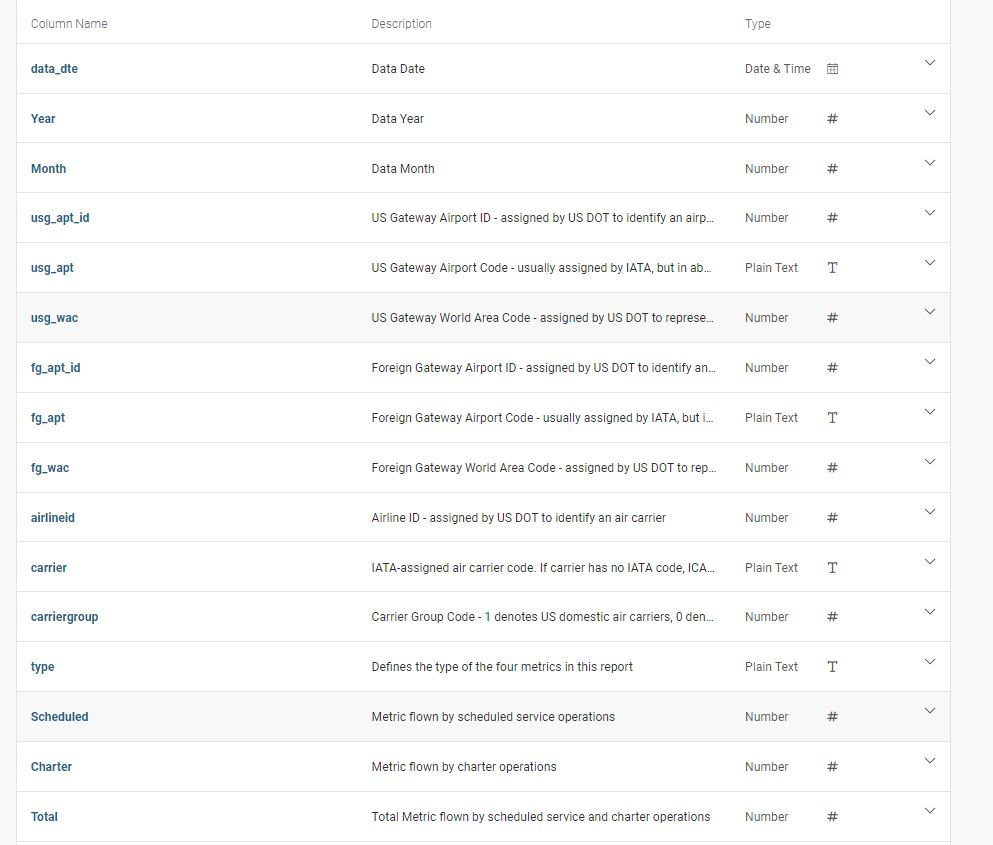

In [2]:
airline = pd.read_csv('D:/Others/dataset/airline/original data/International_Report_Passengers.csv')

In [3]:
airline.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,07/01/2004,2004,7,14747,SEA,93,16229,YVR,906,19687,QX,1,Passengers,19265,0,19265
1,11/01/2008,2008,11,11697,FLL,33,12010,GUA,127,20416,NK,1,Passengers,3099,0,3099
2,10/01/2002,2002,10,10257,ALB,22,16271,YYZ,936,20206,QK,0,Passengers,33,0,33
3,03/01/2007,2007,3,12889,LAS,85,13165,MAN,493,19541,BD,0,Passengers,3815,0,3815
4,03/01/2009,2009,3,12892,LAX,91,13252,MEX,148,19534,AM,0,Passengers,17993,0,17993


In [4]:
airline.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [5]:
#Converting the date column into a datetime format
airline['data_dte']= pd.to_datetime(airline['data_dte'],format='%m/%d/%Y')

#Adding Information for missing carrier values
airline.loc[airline["airlineid"] == 20415, "carrier"] = 'XG'
airline.loc[airline["airlineid"] == 20414, "carrier"] = 'OW'

#Converting the column names lowercase
airline.columns = map(str.lower, airline.columns)

In [6]:
airline_mod = airline.drop(columns = ['year','month','type'])

In [7]:
airline_mod.head()

,data_dte,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,scheduled,charter,total
0,2004-07-01,14747,SEA,93,16229,YVR,906,19687,QX,1,19265,0,19265
1,2008-11-01,11697,FLL,33,12010,GUA,127,20416,NK,1,3099,0,3099
2,2002-10-01,10257,ALB,22,16271,YYZ,936,20206,QK,0,33,0,33
3,2007-03-01,12889,LAS,85,13165,MAN,493,19541,BD,0,3815,0,3815
4,2009-03-01,12892,LAX,91,13252,MEX,148,19534,AM,0,17993,0,17993


In [8]:
#airline_mod.to_excel('D:/Others/dataset/airline/passenger_travel_data.xlsx')

## Airport Codes

We use two datasets of containing airport codes to get the most information on the airport details

In [9]:
airport_codes = pd.read_excel('D:/Others/dataset/airline/original data/airport-codes.xls')
airport_codes = airport_codes.iloc[1::2]
airport_codes = airport_codes[['City name','Airport Code','Airport Name','Country name']]
airport_codes.drop(airport_codes[airport_codes['City name'] == "City name"].index, inplace=True)

In [10]:
airport_codes.head()

,City name,Airport Code,Airport Name,Country name
1,108 Mile Ranch,ZMH,108 Mile Ranch,Canada
3,Aachen,AAH,Aachen/Merzbruck,Germany
5,Aachen,ZIU,Railway,Germany
7,Aalborg,AAL,Aalborg,Denmark
9,Aalesund,AES,Vigra,Norway


In [11]:
airport_codes_ii = pd.read_excel('D:/Others/dataset/airline/original data/Airport Codes by Country.xlsx')

In [12]:
df_all = airport_codes_ii.merge(airport_codes, left_on = "Code", right_on = "Airport Code", how ="left", indicator=True)

extra_codes = df_all[df_all['_merge'] == 'left_only']
extra_codes = extra_codes[['City','Code','Country ']]
extra_codes.rename(columns = {'City':'City name','Code':'Airport Code','Country ':'Country name'}, inplace = True)
extra_codes['Airport Name'] = extra_codes['City name']

In [13]:
all_airport_codes = airport_codes.append(extra_codes)

In [14]:
all_airport_codes.rename(columns = {'City name':'city_name','Airport Code':'airport_code',
                                    'Airport Name':'airport_name','Country name':'country_name'}, inplace = True)

In [15]:
#Renaming certain countries to match with our continents data
di = {'Russian Federation': "Russia", "Cote D'Ivoire (Ivory Coast)": "Cote D'Ivoire",
      "New Zealand (Aotearoa)":"New Zealand","The Netherlands":"Netherlands",
      "Virgin Islands (British)":"British Virgin Islands","Brunei Darussalam":"Brunei",
      "Zaire":"Democratic Republic of Congo","Viet Nam":"Vietnam","Indonesia (East Timor)":"Indonesia",
      "Yugoslavia (Serbia and Montenegro)":"Yugoslavia","Croatia (Hrvatska)":"Croatia","Slovak Republic":"Slovakia",
      "Czechoslovakia (former)":"Czechoslovakia","Korea (South)":"South Korea","Cocos (Keeling) Islands":"Cocos Islands",
      "Unites States":"United States","Wallis and Futuna Islands":"Wallis and Futuna","St. Helena":"Saint Helena",
      "D. R. Congo":"Democratic Republic of Congo","Guam (usa)":"Guam","D. R. Congo (Zaire)":"Democratic Republic of Congo",
      "Us Minor Outlying Islands":"United States Minor Outlying Islands",'TASMANIA"':"Tasmania",
      "Micronesia":"Micronesia (country)","Macau":"Macao","Swaziland":"Eswatini",
      "St. Pierre and Miquelon":"Saint Pierre and Miquelon",'MINNESOTA"':"United States",
      "Serbia & Montenegro":"Serbia","Czech Republic (former Czechoslovakia)":"Czechoslovakia",
      "Falkland Islands (Malvinas)":"Falkland Islands","Korea (North)":"North Korea","Columbia":"Colombia",
      "America":"Brazil","Macedonia":"North Macedonia","Virgin Islands(U.S.)":"United States Virgin Islands",
      "D. R. .Congo (Zaire)":"Democratic Republic of Congo","Hokkaido, Japan":"Japan",
      "Switzerland/France":"France","USA":"United States"}

all_airport_codes = all_airport_codes.replace({"country_name": di})

In [16]:
all_airport_codes.head()

,city_name,airport_code,airport_name,country_name
1,108 Mile Ranch,ZMH,108 Mile Ranch,Canada
3,Aachen,AAH,Aachen/Merzbruck,Germany
5,Aachen,ZIU,Railway,Germany
7,Aalborg,AAL,Aalborg,Denmark
9,Aalesund,AES,Vigra,Norway


In [17]:
#all_airport_codes.to_excel('D:/Others/dataset/airline/airport_codes.xlsx')

## Airline code

In [18]:
airline_code = pd.read_csv('D:/Others/dataset/airline/original data/L_AIRLINE_ID.csv')

In [19]:
airline_code.head()

,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [20]:
airline_code['airline_id'] = airline_code['Description'].apply(lambda x : x.split(":")[-1].strip())
airline_code['airline_name'] = airline_code['Description'].apply(lambda x : x.split(":")[0].strip())
airline_code.rename(columns = {'Code':'code'}, inplace = True)

airline_code = airline_code[['code','airline_id','airline_name']].reset_index(drop=True)

In [21]:
airline_code.head()

,code,airline_id,airline_name
0,19031,MAC,Mackey International Inc.
1,19032,XY,Munz Northern Airlines Inc.
2,19033,COC,Cochise Airlines Inc.
3,19034,GSA,Golden Gate Airlines Inc.
4,19035,RZZ,Aeromech Inc.


In [22]:
#airline_code.to_excel('D:/Others/dataset/airline/airline_codes.xlsx')